##구글 드라이브와 연동하기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Pandas 임포트 후 csv 파일 불러오기.

Pandas는 데이터 분석 및 가공에 사용되는 파이썬 라이브러리이다.

In [0]:
import pandas as pd

In [0]:
df_logs = pd.read_csv('./drive/My Drive/Colab Notebooks/output.csv')

In [4]:
df_logs

,host,ident,authouser,datetime,request,statuscode,bytes,referer,user-agent
0,83.149.9.216,-,-,17/May/2015:10:05:03 +0000,GET /presentations/logstash-monitorama-2013/im...,200,203023,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
1,83.149.9.216,-,-,17/May/2015:10:05:43 +0000,GET /presentations/logstash-monitorama-2013/im...,200,171717,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
2,83.149.9.216,-,-,17/May/2015:10:05:47 +0000,GET /presentations/logstash-monitorama-2013/pl...,200,26185,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
3,83.149.9.216,-,-,17/May/2015:10:05:12 +0000,GET /presentations/logstash-monitorama-2013/pl...,200,7697,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
4,83.149.9.216,-,-,17/May/2015:10:05:07 +0000,GET /presentations/logstash-monitorama-2013/pl...,200,2892,http://semicomplete.com/presentations/logstash...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...
...,...,...,...,...,...,...,...,...,...
9995,63.140.98.80,-,-,20/May/2015:21:05:28 +0000,GET /blog/tags/puppet?flav=rss20 HTTP/1.1,200,14872,http://www.semicomplete.com/blog/tags/puppet?f...,Tiny Tiny RSS/1.11 (http://tt-rss.org/)
9996,63.140.98.80,-,-,20/May/2015:21:05:50 +0000,GET /blog/geekery/solving-good-or-bad-problems...,200,10756,-,Tiny Tiny RSS/1.11 (http://tt-rss.org/)
9997,66.249.73.135,-,-,20/May/2015:21:05:00 +0000,GET /?flav=atom HTTP/1.1,200,32352,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...
9998,180.76.6.56,-,-,20/May/2015:21:05:56 +0000,GET /robots.txt HTTP/1.1,200,-,-,Mozilla/5.0 (Windows NT 5.1; rv:6.0.2) Gecko/2...


##**문제 2> IP 주소 "68.184.202.186"은 서버에 몇 번 데이터를 요청 했나요?**

In [0]:
cnt=0

for value in df_logs["host"]:
  if value == "68.184.202.186":
    cnt += 1

In [0]:
"IP 주소 '68.184.202.186'은 서버에 총 {}번 데이터를 요청했습니다".format(cnt)

"IP 주소 '68.184.202.186'은 서버에 총 6번 데이터를 요청했습니다"

혹시 request에 잘못된 값이 있거나 아예 요청이 없었을 수도 있으니(?), IP 주소가 "68.184.202.186"인 클라이언트의 로그 기록만 살펴보자.

In [0]:
df_logs[df_logs['host']=='68.184.202.186']

,host,ident,authouser,datetime,request,statuscode,bytes,referer,user-agent
153,68.184.202.186,-,-,17/May/2015:11:05:28 +0000,GET /projects/xpathtool/ HTTP/1.1,200,10745,https://www.google.com/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_5)...
154,68.184.202.186,-,-,17/May/2015:11:05:02 +0000,GET /reset.css HTTP/1.1,200,1015,http://www.semicomplete.com/projects/xpathtool/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_5)...
155,68.184.202.186,-,-,17/May/2015:11:05:05 +0000,GET /images/jordan-80.png HTTP/1.1,200,6146,http://www.semicomplete.com/projects/xpathtool/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_5)...
156,68.184.202.186,-,-,17/May/2015:11:05:02 +0000,GET /style2.css HTTP/1.1,200,4877,http://www.semicomplete.com/projects/xpathtool/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_5)...
157,68.184.202.186,-,-,17/May/2015:11:05:37 +0000,GET /images/web/2009/banner.png HTTP/1.1,200,52315,http://www.semicomplete.com/projects/xpathtool/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_5)...
158,68.184.202.186,-,-,17/May/2015:11:05:58 +0000,GET /favicon.ico HTTP/1.1,200,3638,-,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_5)...


"68.184.202.186"은 서버에 'GET' 요청을 총 6번 했다는 것을 확인할 수 있다. 


##**문제3> 전체 HTTP 응답 중에서 200 응답 코드의 비율은 어떻게 되나요?**

먼저, 로그 기록 중 "statuscode"에  값이 안들어있거나, 공백 또는 ' -'이 포함되어 있는지 확인했다.

In [0]:
cnt = 0

for code in df_logs["statuscode"]:
  if code == "-" or code == " " or code == "":
    continue
  cnt+= 1

cnt

10000

위의 결과를 통해서 **응답하지 않은 경우**는 없었다.

"statuscode"의 길이는 곧 전체 HTTP 응답 수와 같다.

In [0]:
total = len(df_logs["statuscode"])

In [0]:
total

10000

"statuscode" 중에서 '200'에 해당되는 값을 카운팅 한다.


In [0]:
cnt = 0

for value in df_logs["statuscode"]:
  if value == 200:
    cnt += 1

In [0]:
cnt

9126

전체 응답 수와  ''200'을 카운팅 한 수를 이용하여 비율을 계산한다.

(*※  round() 함수는 소수 첫 번째 자리에서 반올림 한다.*)

In [0]:
"전체 HTTP 응답 중 200 응답의 비율은 {}% 입니다.".format(round((cnt/total)*100))

'전체 HTTP 응답 중 200 응답의 비율은 91% 입니다.'

##**문제 4> User-agent 를 파싱한 후 os 별 접속자 통 계를 구해 보세요.**

데이터 프레임으로 저장된 로그 정보에서 "user-agent"의 정보를 이용하여,
클라이언트의 OS 정보를 확인하고자 한다.

for 문을 이용하여 1만 개의 "user-agent" 데이터를 OS 리스트와 하나하나 비교하고 OS 정보를 파악하여, "os 리스트"에 순서대로 추가한다.

[user-agent에 내포된 OS 정보 ](https://charls.tistory.com/entry/useragent-NginX-Lua-Script%EB%A5%BC-%EC%9D%B4%EC%9A%A9%ED%95%9C-OS-Browser-%ED%99%95%EC%9D%B8)

In [0]:
os = []

for client in df_logs["user-agent"]:
  if "windows nt 5.1" in client.lower():
    os.append("Windows XP")
  elif "windows nt 6.0" in client.lower():
    os.append("Windows Vista")
  elif "windows nt 6.1" in client.lower():
    os.append("Windows 7")
  elif "windows nt 6.2" in client.lower():
    os.append("Windows 8")
  elif "windows nt 6.3" in client.lower():
    os.append("Windows 8.1")
  elif "windows nt 10.0" in client.lower():
    os.append("Windows 10")
  elif "windows phone 8.1" in client.lower():
    os.append("Windows Phone 8.1")
  elif "windows phone 10.0" in client.lower():
    os.append("Windows Phone 10")
  elif "android" in client.lower():
    os.append("Android")
  elif "blackberry" in client.lower():
    os.append("BlackBerry")
  elif "iphone" in client.lower():
    os.append("IPhone")
  elif "ipad" in client.lower():
    os.append("IPad")
  elif "ipod" in client.lower():
    os.append("IPod")
  elif "mac" in client.lower():
    os.append("Mac")
  elif "x11" in client.lower():
    os.append("Linux(X Windows)")
  elif "windows" in client.lower():
    os.append("Windows ETC")
  elif "googlebot" in client.lower():
   os.append("Google BOT")
  elif "tizen" in client.lower():
    os.append("Tizen")
  else:
    os.append("Undefined OS")

print(len(os))

10000


총 1만개의 OS 정보를 확보한 것을 확인했으니, 이를 데이터 프레임 형식으로 변환하자.

('count'는 os별 집계 결과를 구하는데 필요.)

In [0]:
df_os = pd.DataFrame(data={'os' : os, 'count' : 0})

In [0]:
df_os

,os,count
0,Mac,0
1,Mac,0
2,Mac,0
3,Mac,0
4,Mac,0
...,...,...
9995,Undefined OS,0
9996,Undefined OS,0
9997,Google BOT,0
9998,Windows XP,0


Group by 기능을 이용하여, os 항목별로 묶고, 카운팅을 수행한다.

In [0]:
counted_os = df_os.groupby("os").count()

In [0]:
counted_os

,count
os,
Android,187
Google BOT,272
IPad,61
IPhone,358
Linux(X Windows),2046
Mac,1444
Undefined OS,2318
Windows 7,2211
Windows 8,112


In [0]:
counted_os['count'].sum()

10000

카운팅의 총 합이 1만이므로, 집계 결과에 문제는 없다. 

먼저, `matplotlib` 패키지를 임포트 하자.

>"`Matplotlib`는 파이썬에서 자료를 차트(chart)나 플롯(plot)으로 시각화(visulaization)하는 패키지이다. Matplotlib는 다음과 같은 정형화된 차트나 플롯 이외에도 저수준 api를 사용한 다양한 시각화 기능을 제공한다."

In [0]:
from matplotlib import pyplot

`pyplot.axis('equal')`은 타원이 아닌 동그란 원 형태로 만들어 주기 위함이다.

os별 집계 결과 데이터 프레임에서 'count ' 항목을 기준으로 파이 형태의 그래프를 그린다. 그리고 그래프와 폰트 사이즈를 설정한 뒤 결과(퍼센티지)는 소수점 첫 째자리 까지 표현한다.


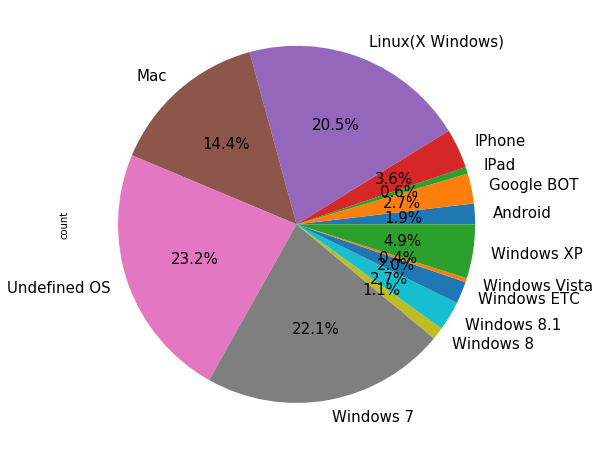

In [0]:
pyplot.axis('equal')

result = counted_os['count'].plot(kind='pie', figsize=(8, 8), fontsize=15, autopct='%.1f%%')

##**문제 5> IP 주소, 요청 uri, HTTP 응답 코드로만 구성된 csv 파일을 만들어 보세요.**

웹 서버 로그 기록 중 **'request'**는 **'요청 메서드 + 요청 URI + 프로토콜 버젼'**으로 구성되어 있다. 이 세 가지 구성은 각각 띄어쓰기로 구분되어 있다.

split() 함수로 request 문자열을 공백 기준으로 나눈 뒤, 요청 URI만 추출한다.

In [0]:
uri = []

for request in df_logs['request']:
  uri.append(request.split(" ")[1])

print(len(uri))

10000


추출한 1만 개의 URI로 새로운 데이터 프레임을 만든다.

In [0]:
df_uri = pd.DataFrame(data={'uri' : uri})

In [0]:
df_uri

,uri
0,/presentations/logstash-monitorama-2013/images...
1,/presentations/logstash-monitorama-2013/images...
2,/presentations/logstash-monitorama-2013/plugin...
3,/presentations/logstash-monitorama-2013/plugin...
4,/presentations/logstash-monitorama-2013/plugin...
...,...
9995,/blog/tags/puppet?flav=rss20
9996,/blog/geekery/solving-good-or-bad-problems.htm...
9997,/?flav=atom
9998,/robots.txt


기존의 '로그 기록' 데이터 프레임에서 'host'와 'statuscode' 열을 가져오고,

위에서 만든 'URI' 데이터 프레임을 가져와서 새로운 데이터 프레임을 생성한다.

In [0]:
df_new = pd.concat([df_logs["host"], df_uri["uri"], df_logs["statuscode"]], axis=1)

In [0]:
df_new

,host,uri,statuscode
0,83.149.9.216,/presentations/logstash-monitorama-2013/images...,200
1,83.149.9.216,/presentations/logstash-monitorama-2013/images...,200
2,83.149.9.216,/presentations/logstash-monitorama-2013/plugin...,200
3,83.149.9.216,/presentations/logstash-monitorama-2013/plugin...,200
4,83.149.9.216,/presentations/logstash-monitorama-2013/plugin...,200
...,...,...,...
9995,63.140.98.80,/blog/tags/puppet?flav=rss20,200
9996,63.140.98.80,/blog/geekery/solving-good-or-bad-problems.htm...,200
9997,66.249.73.135,/?flav=atom,200
9998,180.76.6.56,/robots.txt,200


새로 생성한 데이터 프레임을 CSV 파일(new_output.csv)로 변환하여 저장한다.

In [0]:
new_output = df_new.to_csv("./drive/My Drive/Colab Notebooks/new_output.csv", mode='w',  index = False)

In [0]:
pd.read_csv('./drive/My Drive/Colab Notebooks/new_output.csv')

,host,uri,statuscode
0,83.149.9.216,/presentations/logstash-monitorama-2013/images...,200
1,83.149.9.216,/presentations/logstash-monitorama-2013/images...,200
2,83.149.9.216,/presentations/logstash-monitorama-2013/plugin...,200
3,83.149.9.216,/presentations/logstash-monitorama-2013/plugin...,200
4,83.149.9.216,/presentations/logstash-monitorama-2013/plugin...,200
...,...,...,...
9995,63.140.98.80,/blog/tags/puppet?flav=rss20,200
9996,63.140.98.80,/blog/geekery/solving-good-or-bad-problems.htm...,200
9997,66.249.73.135,/?flav=atom,200
9998,180.76.6.56,/robots.txt,200
